In [1]:
# File system manangement
import time, psutil, os
import multiprocessing
# from multiprocessing import Pool, cpu_count
from concurrent.futures import ProcessPoolExecutor

# Data manipulation
import numpy as np
import pandas as pd


# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud,STOPWORDS
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from num2words import num2words
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')



# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD
import dill as pickle
from joblib import dump, load

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kishor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('../Dataset/Perfect_dataset.csv')

In [3]:
print(pd.Series({"Memory usage": "{:.2f} MB".format(df.memory_usage().sum()/(1024*1024)), 
                 "Dataset shape": "{}".format(df.shape)}).to_string())

Memory usage         20.14 MB
Dataset shape    (1320086, 2)


In [4]:
df['description'].iloc[0]

"Inner Engineering: A Yogi's Guide to Joy About the Author Sadhguru Jaggi VasudevSADHGURU is a yogi, mystic, and visionary who established the Isha Foundation, a nonprofit dedicated to the cultivation of human potential. He belongs to no particular tradition, and his scientific methods for self-transformation have universal appeal. Sadhguru has been an in?uential voice at global forums including the United Nations and the World Economic Forum. He is the author of Inner Engineering (Spiegel & Grau, 2016) and makes his residence in India and Tennessee. For more, visit innerengineering.com.Sadhguru Jaggi VasudevSADHGURU is a yogi, mystic, and visionary who established the Isha Foundation, a nonprofit dedicated to the cultivation of human potential. He belongs to no particular tradition, and his scientific methods for self-transformation have universal appeal. Sadhguru has been an in?uential voice at global forums including the United Nations and the World Economic Forum. He is the author 

In [5]:
print(pd.Series({"Number of observations with missing values": len(df) - len(df.dropna()),
                 "Number of duplicate observations": df.duplicated().sum()}).to_string())

Number of observations with missing values        0
Number of duplicate observations              11246


In [6]:
df.drop_duplicates(inplace = True) # Dropping duplicate observations
df.reset_index(drop = True, inplace = True) # Resetting index

In [7]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())
    
check_null(df)


Null Values in each col in the df dataset:

description    0
label          0
dtype: int64


In [8]:
df.label.value_counts().tail(10)

label
Clothing & Accessories     107370
Footwear                   103301
Furniture                   91403
Household                   62542
Watches                     56456
Health & Beauty             21508
Toys & Games                18990
Grocery & Gourmet Foods      7926
Books                        6256
Electronics                  5308
Name: count, dtype: int64

In [9]:
df = df.groupby('label').apply(lambda x: x.sample(5000,)).reset_index(drop=True)

In [10]:
df.label.value_counts()

label
Books                      5000
Clothing & Accessories     5000
Electronics                5000
Footwear                   5000
Furniture                  5000
Grocery & Gourmet Foods    5000
Health & Beauty            5000
Household                  5000
Jewelry                    5000
Sports & Outdoors          5000
Toys & Games               5000
Watches                    5000
Name: count, dtype: int64

In [11]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)
    
    
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']


In [12]:
cat_summary_with_graph(df, 'label')

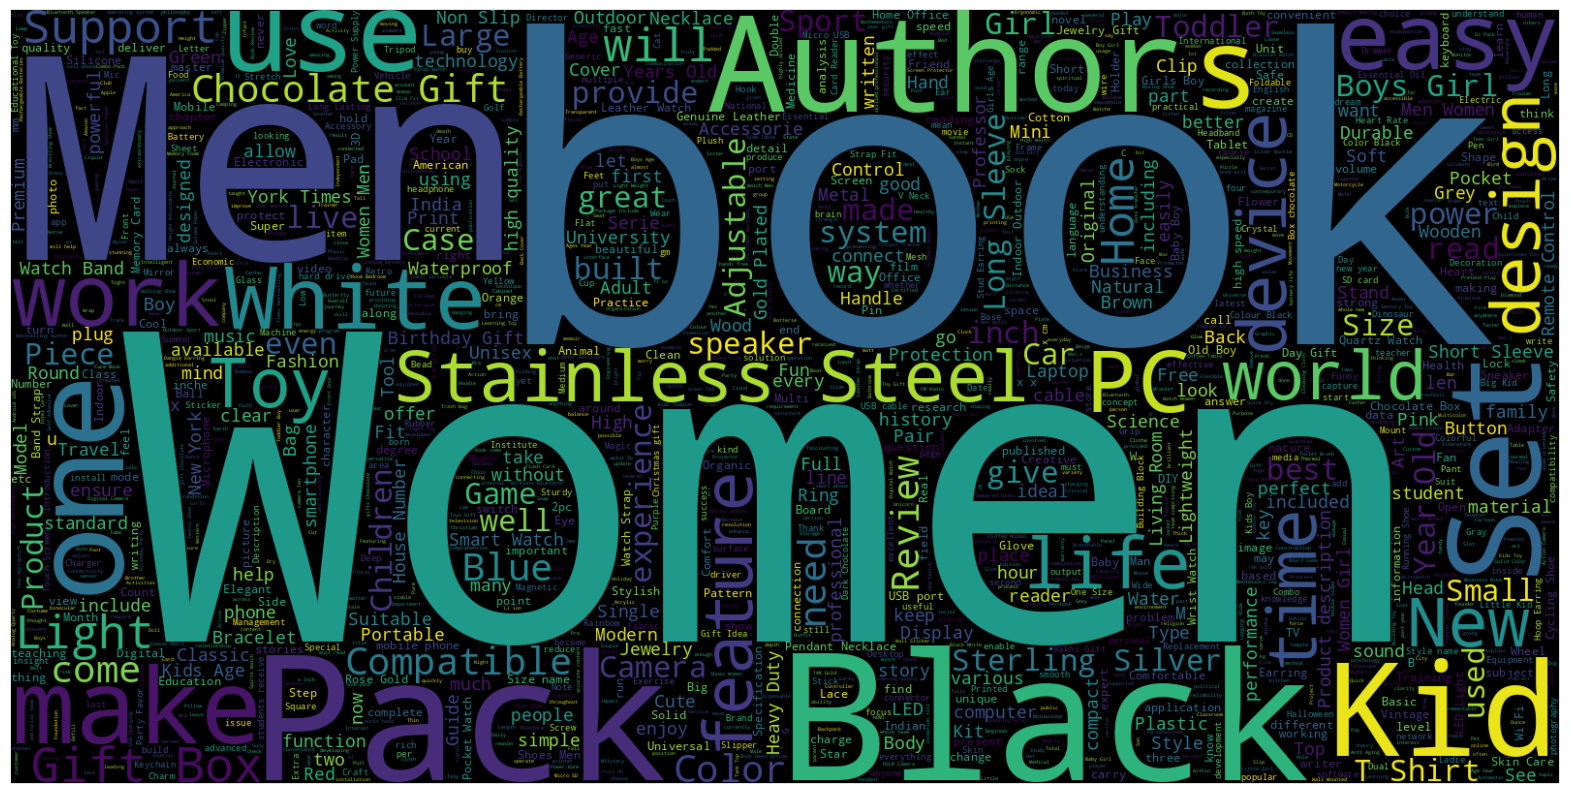

In [13]:
def wordcloud_vis(df, col_name):
    
    plt.figure(figsize=(20, 20)) 
    wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df[col_name]))
    plt.imshow(wc, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.show()
wordcloud_vis(df, 'description')


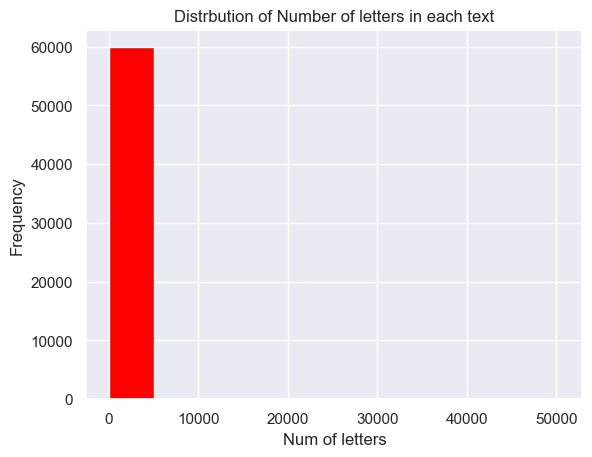

In [14]:
def number_letters(df, col_name):
    
    letters_len=df[col_name].str.len()
    plt.hist(letters_len,color='red')
    plt.title("Distrbution of Number of letters in each text")
    plt.xlabel("Num of letters")
    plt.ylabel("Frequency")
    plt.show()
number_letters(df, 'description')


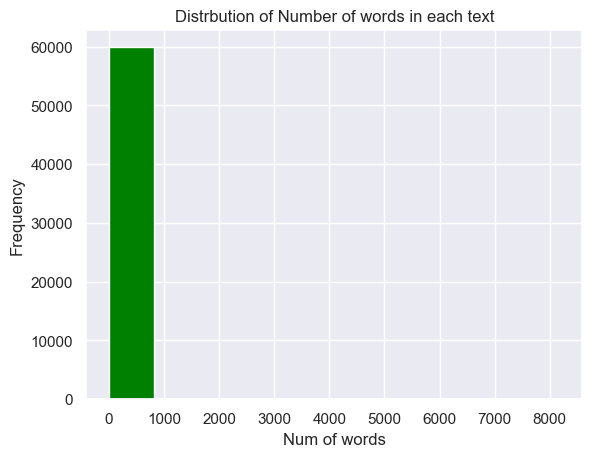

In [15]:
def number_words(df, col_name):
    
    words_len=df[col_name].str.split().map(lambda x: len(x))
    plt.hist(words_len,color='green')
    plt.title("Distrbution of Number of words in each text")
    plt.xlabel("Num of words")
    plt.ylabel("Frequency")
    plt.show()
number_words(df, 'description')


/tmp/ipykernel_88113/153584214.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




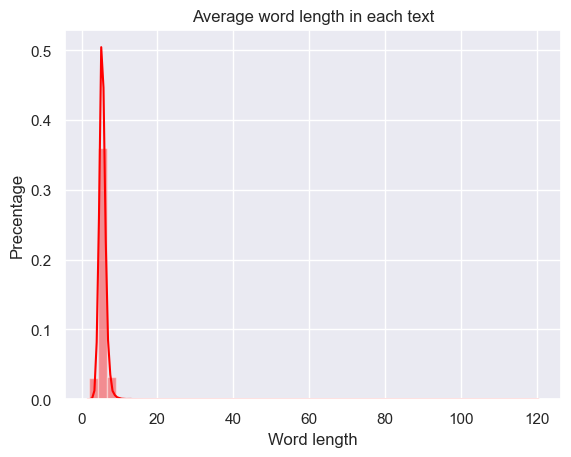

In [16]:
def avg_word_len(df, col_name):
    
    word=df[col_name].str.split().apply(lambda x : [len(i) for i in x])
    word = word.map(lambda x: np.mean(x))
    sns.distplot(word,color='red')
    plt.title("Average word length in each text")
    plt.xlabel("Word length")
    plt.ylabel("Precentage")
    plt.show()
avg_word_len(df, 'description')


In [17]:
df.label.value_counts()

label
Books                      5000
Clothing & Accessories     5000
Electronics                5000
Footwear                   5000
Furniture                  5000
Grocery & Gourmet Foods    5000
Health & Beauty            5000
Household                  5000
Jewelry                    5000
Sports & Outdoors          5000
Toys & Games               5000
Watches                    5000
Name: count, dtype: int64

# Manual encoding of labels
label_dict = {
    'Books': 0, 
    'Clothing & Accessories': 1, 
    'Electronics': 2, 
    'Footwear': 3,
    'Furniture':4,
    'Grocery & Gourmet Foods':5,
    'Health & Beauty':6,
    'Household':7,
    'Jewelry':8,
    'Sports & Outdoors':9,
    'Toys & Games':10,
    'Watches':11
    }
df.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(df.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(df.shape)}).to_string())
df

In [18]:
lbl_enc = LabelEncoder()
df.label = lbl_enc.fit_transform(df.label)
df.label[4995:5005] 

label_mapping = {encoded:label for label, encoded in zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_))}
label_mapping

{'Books': 0,
 'Clothing & Accessories': 1,
 'Electronics': 2,
 'Footwear': 3,
 'Furniture': 4,
 'Grocery & Gourmet Foods': 5,
 'Health & Beauty': 6,
 'Household': 7,
 'Jewelry': 8,
 'Sports & Outdoors': 9,
 'Toys & Games': 10,
 'Watches': 11}

In [19]:
dump(label_mapping, 'label_mapping_dict.pkl')

['label_mapping_dict.pkl']

In [66]:
load('label_mapping_dict.pkl')['Books']

0

In [20]:
# Feature-target split
X, y = df.drop('label', axis = 1), df['label']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set, validation set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
# fig.show()

# Text Normalization

- **Convertion to Lowercase**
- **Removal of Whitespaces**
- **Removal of Punctuations**
- **Removal of Unicode Characters**
- **Substitution of Acronyms**
- **Substitution of Contractions**
- **Removal of Stop Words**
- **Spelling Correction**
- **Stemming and Lemmatization**
- **Discardment of Non-alphabetic Words**
- **Retainment of Relevant Parts of Speech**
- **Removal of Additional Stop Words**
- **Integration of the Processes**
- **Implementation on Product Description**

In natural language processing, **text normalization** is the process of transforming text into a single canonical form. We consider a number of text normalization processes. At the end of the section, we combine selected processes into one single function and apply it on the product descriptions.

## Convertion to Lowercase

We convert all alphabetical characters of the tweets to lowercase so that the models do not differentiate identical words due to case-sensitivity. For example, without the normalization, *Sun* and *sun* would have been treated as two different words, which is not useful in the present context.

In [21]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


## Removal of Whitespaces

We remove the unnecessary empty spaces from the description of the observations.

In [22]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


## Removal of Punctuations

Mostly the punctuations do not play any role in predicting whether a particular tweet indicate disaster or not. Thus we prevent them from contaminating the classification procedures by removing them from the tweets. However, we keep **apostrophe** since most of the contractions contain this punctuation and will be automatically taken care of once we convert the contractions.

In [23]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


## Removal of Unicode Characters

The training tweets are typically sprinkled with emojis, URLs, punctuation and other symbols that do not contribute meaningfully to our analysis, but instead create noise in the learning procedure. Some of these symbols are unique, while the rest usually translate into unicode strings. We remove these irrelevant characters from the data using the regular expression module.

In [24]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>
Output:  Ecommerce Text Classification 


In [25]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [26]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


## Substitution of Acronyms

[**Acronyms**](https://en.wikipedia.org/wiki/Acronym) are shortened forms of phrases, generally found in informal writings. For instance, *for your information* is written as *fyi* and *by the way* is written as *btw*. These time and effort-saving acronyms have received almost universal acceptance in recent times. For the sake of proper modeling, we convert the acronyms, appearing in the tweets, back to their respective original forms.

In [27]:
# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [28]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [29]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [30]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [31]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


## Substitution of Contractions

A [**contraction**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions) is a shortened form of a word or a phrase, obtained by dropping one or more letters.

These are commonly used in everyday speech, written dialogue, informal writing and in situations where space is limited or costly, such as advertisements. Usually the missing letters are indicated by an apostrophe, but there are exceptions. Examples: **I'm = I am**, **let's = let us**, **won't = would not**, **howdy = how do you do**.

We have compiled an extensive list of English contractions, which can be found in the attached .json file titled *english_contractions*. The list is largely based on information obtained from [**this wikipedia page**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions) on *list of English contractions*. Note that the file only considers contractions in lowercase, i.e. it assumes that the textual data have already been transformed to lowercase before substituting the contractions. For example, the process will convert **i'll** to **i shall** but will leave **I'll** unchanged.

In [32]:
# Dictionary of contractions
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

print("Example: Original form of the contraction 'aren't' is '{}'".format(contractions_dict["aren't"]))

Example: Original form of the contraction 'aren't' is 'are not'


In [33]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


The contractions do not always have a one-to-one mapping with the original words. For example **i'd** can come from both **i had** and **i would**. In the .json file only one the original words/phrases are chosen. However, this does not affect our analysis since words like **had** and **would**, which do not have any meaningful contribution in achieving the objective of the project, will be discarded in the next subsection.

In [34]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [35]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


## Removal of Stop Words

Several words, primarily pronouns, prepositions, modal verbs etc, are identified not to have much effect on the classification procedure. These are called [**stop words**](https://en.wikipedia.org/wiki/Stop_word). To get rid of the unwanted contamination effect, we remove these words.

In [36]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text))) 

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


## Spelling Correction

The classification procedure cannot take mispellings into consideration and treats a word and its misspelt version as separate words. For this reason it is necessary to conduct spelling correction before feeding the data to the classification procedure.

In [38]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


## Stemming and Lemmatization

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) is the process of reducing the words to their root form or **stem**. It reduces related words to the same *stem* even if the stem is not a dictionary word. For example, the words **introducing**, **introduced**, **introduction** reduce to a common word **introduce**. However, the process often produces stems that are not actual words.

In [39]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


The stems **introduc**, **lemmat** and **improv** are not actual words. [**Lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation) offers a more sophisticated approach by utilizing a corpus to match root forms of the words. Unlike stemming, it uses the context in which a word is being used.

In [90]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


## Discardment of Non-alphabetic Words

The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying tweets into non-disaster and disaster categories. Hence we discard these words.

In [41]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


## Retainment of Relevant Parts of Speech

The [**parts of speech**](https://en.wikipedia.org/wiki/Part_of_speech) provide a great tool to select a subset of words that are more likely to contribute in the classification procedure and discard the rest to avoid noise. The idea is to select a number of parts of speech that are important to the context of the problem. Then we partition the words in a given text into several subsets corresponding to each part of speech and keep only those subsets corresponding to the selected parts of speech. 

In [42]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


For an extensive list of part-of-speech tags, see the [**alphabetical list of part-of-speech tags used in the Penn Treebank Project**](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

## Removal of Additional Stop Words

Analyzing the data, we observe that several unnecessary words, which are not included in the ready-made set of **stop words**, keep appearing in the text corpus. We discard these words to remove noise in the classification procedure.

In [43]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

## Integration of the Processes

We integrate the text normalization processes in appropriate order. We have kept the **spelling correction** step commented out as it takes a massive amount of time to run on large datasets.

In [44]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_whitespace(text)
    text = remove_stopwords(text)
    text = remove_additional_stopwords(text)
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    # text = keep_pos(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization


Output: we shall combine function single function apply product description hate en wikipedia or wiki textnormalization


In [45]:
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

num_cores = multiprocessing.cpu_count()-1
num_cores

def parallel_normalizer_apply(chunk):
    return chunk.apply(text_normalizer)

In [48]:
%%time

chunks = np.array_split(data_train['description'], num_cores)

with ProcessPoolExecutor() as executor:
    results = list(executor.map(parallel_normalizer_apply, chunks))

data_train_norm['normalized description'] = pd.concat(results)

CPU times: user 173 ms, sys: 151 ms, total: 324 ms
Wall time: 1h 45min 32s


In [46]:
%%time

chunks = np.array_split(data_val['description'], num_cores)

with ProcessPoolExecutor() as executor:
    results = list(executor.map(parallel_normalizer_apply, chunks))

data_val_norm['normalized description'] = pd.concat(results)


CPU times: user 60.1 ms, sys: 79.4 ms, total: 140 ms
Wall time: 22min 28s


In [47]:
data_val_norm

,normalized description
53632,stem toy piece building block toy kid educatio...
32594,man company dial gift set sweat control pack a...
37974,reflective yellow vinyl number sticker number ...
54145,granola toddler touch light musical doodle boa...
31917,veld age killer face lift anti age cream face ...
...,...
13557,beesclover us sit idea easy drive line idea ha...
19635,vbedkdeb running shoe man trekking shoe man fl...
50287,kooks busy board montessori toy toddler year o...
10454,fitch solar foldable charger black


In [50]:
%%time
chunks = np.array_split(data_test['description'], num_cores)

# Execute parallel processing using ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    results = list(executor.map(parallel_normalizer_apply, chunks))

# Combine the results and update the dataframe
data_test_norm['normalized description'] = pd.concat(results)

CPU times: user 55.6 ms, sys: 108 ms, total: 163 ms
Wall time: 21min 49s


In [51]:
data_train_norm['label'] = data_train['label']
data_val_norm['label'] = data_val['label']
data_test_norm['label'] = data_test['label']

In [52]:
data_test_norm.to_csv("data_test_norm.csv", index=False)
data_train_norm.to_csv("data_train_norm.csv", index=False)
data_val_norm.to_csv('data_val_norm.csv', index=False)

In [53]:
data_test_norm

,normalized description,label
41055,natural diamond heart pendant necklace woman s...,8
46348,forme peaktrail lady hybrid bike green inch,9
9924,girl bike short dance breathable safety biker ...,1
38617,pack disposable paper bowl of large paper bowl...,7
7544,boy vest zip button hood lightweight warm,1
...,...,...
40330,rash banyan raki lumbar hiya bhaji pack handcr...,8
11220,pro fetch dog harness mount camera style name ...,2
52072,learn resource code go robot mouse piece age c...,10
41904,anxiety pin badge anxiety pin badge hmm mental...,8


In [54]:
data_train_norm[data_train_norm['normalized description'].isna()==True]

,normalized description,label


In [55]:
X_train_norm, y_train = data_train_norm['normalized description'].tolist(), data_train_norm['label'].tolist()
X_val_norm, y_val = data_val_norm['normalized description'].tolist(), data_val_norm['label'].tolist()
X_test_norm, y_test = data_test_norm['normalized description'].tolist(), data_test_norm['label'].tolist()

In [56]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)



In [67]:
dump(TfidfVec, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [57]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [58]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        print(model)
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
        print(model)
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [59]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

LogisticRegression(max_iter=1000)
LogisticRegression(max_iter=1000)
KNeighborsClassifier(n_jobs=-1, n_neighbors=149)
KNeighborsClassifier(n_jobs=-1, n_neighbors=149)
DecisionTreeClassifier()
DecisionTreeClassifier()
SVC(kernel='linear')
SVC(kernel='linear')
RandomForestClassifier()
RandomForestClassifier()
SGDClassifier()
SGDClassifier()
RidgeClassifier()
RidgeClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=N

,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.969571,0.926111
6,Ridge Classifier,0.964571,0.920222
0,Logistic Regression,0.952048,0.918444
5,SGD Classifier,0.941405,0.914111
4,Random Forest,0.999476,0.909889
7,XGBoost,0.961381,0.906222
1,KNN Classifier,0.860452,0.858222
2,Decision Tree,0.999476,0.835778
8,AdaBoost,0.660262,0.655222


In [60]:
# Hyperparameter tuning for linear SVM
svm_classifier = svm.SVC()
params_svm = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]
}

best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
for g in ParameterGrid(params_svm):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    svm_classifier.set_params(**g)
    svm_classifier.fit(X_train_tfidf, y_train)
    y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score_svm:
        best_params_svm, best_score_svm = g, score_val

best_model_tfidf, best_params_tfidf, best_score_tfidf = svm.SVC(), best_params_svm, best_score_svm
best_model_tfidf.set_params(**best_params_tfidf)
print(f"Best model: {best_model_tfidf}")
print(" ")
print(f"Best parameters: {best_params_tfidf}")
print(f"Best validation accuracy: {best_score_tfidf}")

Gridpoint #1: {'C': 0.1, 'kernel': 'linear'}
Training accuracy: 0.9153095238095238, Validation accuracy: 0.9002222222222223, Runtime: 5m32s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear'}
Training accuracy: 0.9695714285714285, Validation accuracy: 0.9261111111111111, Runtime: 3m36s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear'}
Training accuracy: 0.9945714285714286, Validation accuracy: 0.9203333333333333, Runtime: 3m34s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear'}
Training accuracy: 0.9986190476190476, Validation accuracy: 0.9115555555555556, Runtime: 3m47s
 
Best model: SVC(C=1, kernel='linear')
 
Best parameters: {'C': 1, 'kernel': 'linear'}
Best validation accuracy: 0.9261111111111111


In [61]:
best_model_tfidf

SVC(C=1, kernel='linear')

In [79]:
def modeling(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Model Accuarcy: {score*100}%")
    return y_pred

modeling(best_model_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)

Model Accuarcy: 92.56666666666666%


array([ 8,  9,  9, ..., 10,  8,  3])

In [81]:
best_model_tfidf.predict(X_test_tfidf)

array([ 8,  9,  9, ..., 10,  8,  3])

In [82]:
dump(best_model_tfidf, 'svm_model.pkl')

['svm_model.pkl']

In [83]:
svm_model = load('svm_model.pkl')
label_mapping_dict = load('label_mapping_dict.pkl')
tfidf_vectorizer = load('tfidf_vectorizer.pkl')

# Store the functions and objects in a single pickle file
dump((text_normalizer, tfidf_vectorizer, svm_model, label_mapping_dict), 'pipeline.pkl')

# # Example usage
# input_text = "Your input text here"
# text_normalizer, classify_text, svm_model, label_mapping_dict = load('pipeline.pkl')
# predicted_category = classify_text(input_text)
# print("Predicted category:", predicted_category)


['pipeline.pkl']

In [88]:
input_text = "The PCOD - Thyroid Book - Compiled From Women and the Weight Loss Tamasha Review This book is very useful for our health and we must first create that in our lives. that requires making time for ourselves, be it for exercise, to eat right . --By A Customer on 5 feb 2016 				    	 					 About the Author India’s best-loved fitness professional, Rujuta Diwekar, is the winner of the prestigious Nutrition Award from the Asian Institute of Gastroenterology. Her educational background in Sports science and nutrition, her understanding and practice of yoga and her more than 15 years of experience working with people from all walks of life including Kareena Kapoor, Anil Ambani, Alia Bhatt, Saif Ali Khan, Varun Dhawan, Anupam Kher and many more, has come together in this book."
text_normalizer, classify_text, svm_model, label_mapping_dict = load('pipeline.pkl')
cleaned_text = text_normalizer(input_text)
vectorized_text = classify_text.transform([cleaned_text])
predicted_category = svm_model.predict(vectorized_text)
for i in label_mapping_dict:
    if label_mapping_dict[i] == predicted_category:
        predicted_category = i
        break
print("Predicted category:", predicted_category)


Predicted category: Books
